# Pima Indian Diabetes Dataset - GA HW #3
### Zen Yui | 2016-02-27

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.grid_search import GridSearchCV
%matplotlib inline

In [158]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
plt.style.use('ggplot')

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
cols = ['pregnancies','glucose','bp','skin','insulin','bmi','ped','age','class']
df = pd.read_csv(url, header=None)
df.columns = cols

In [4]:
# necessary?
df['class'] = pd.Categorical(df['class'])

In [5]:
df.describe()

,pregnancies,glucose,bp,skin,insulin,bmi,ped,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [6]:
df.tail()

,pregnancies,glucose,bp,skin,insulin,bmi,ped,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### dataset and observations

<strong><i>goal:</i></strong> To determine the most effecitve machine learning algorithm for predicting diabetes given the provided dataset

<strong><i>preliminary observations:</i></strong>
<ul>
<li>8 attributes and a positive/negative diabetes diagnosis</li>
<li>768 Pima Indian patients</li>
<li>all patients are female</li>
<li>all patients at leats 21 years of age</li>
<li>all features are numeric</li>
<li>overall diagnoses rate is ~35%</li>
</ul>


<strong><i>data dictionary:</i></strong>
<ul>
<li><strong>preg</strong> (int) - <i>Number of times pregnant</i></li>
<li><strong>glu</strong> (int) - <i>Plasma glucose concentration a 2 hours in an oral glucose tolerance test</i></li>
<li><strong>bp</strong> (int) - <i>Diastolic blood pressure (mm Hg)</i></li>
<li><strong>skin</strong> (int) - <i>Triceps skin fold thickness (mm)</i></li>
<li><strong>insulin</strong> (int) - <i>2-Hour serum insulin (mu U/ml)</i></li>
<li><strong>bmi</strong> (float) - <i>Body mass index (weight in kg/(height in m)^2)</i></li>
<li><strong>ped</strong> (float) - <i>Diabetes pedigree function</i></li>
<li><strong>age</strong> (int) - <i>Age (years)</i></li>
<li><strong>class</strong> (int) - <i>Class variable (0 or 1) - 1 is a positive diabetes diagnosis</i></li>
</ul>

### handle missing data

In [7]:
# Filling glucose, bp, skin, and insulin with np.nan as "0" values are meaningless
for feature in ['glucose','bp','skin','insulin','bmi']:
    df.loc[:,feature].replace(to_replace=0, value=np.nan, inplace=True)

In [8]:
# fill null records with median of that feature
for f in ['glucose','bmi','bp','insulin','skin']:
    med = df[f].median()
    df[f].fillna(med, inplace=True)

### hw2 performance summary
My HW2 performnce in the Pima Indians Diabetes dataset was good, but I definitely see areas for improvement.  I spent considerable trying to understand the dataset and create a good data dictionary, and it paid off.  When I wasn't sure about the best course of action (like deciding between two methods of handling missing data), I created tried both, and I ended up with better overall performance as a result.

I feel that I could have done a better job with the logistic regression models, as I saw almost no difference in performnace between the no-penalty, lasso, and ridge models.

I would also like to do do feature selection / engineering per model as opposed to a global approach, as the models certainly perform better/worse with different datasets.

### split and scale data

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, ShuffleSplit

In [10]:
# separate the data set into features and prediction
X = df.drop('class',axis=1)
y = df['class']

In [11]:
# scale data
scale = StandardScaler()
X_scale = pd.DataFrame(scale.fit_transform(X))
X_scale.columns = X.columns

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25, random_state=0)
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.25, random_state=0)

### k-means clustering

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

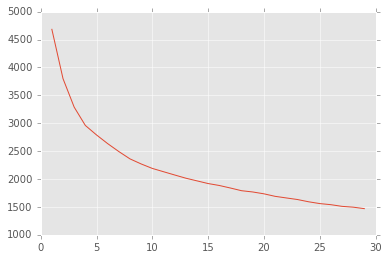

In [106]:
# finding the elbow plotting inertia
k = []
i = []
for n in range(1,30):
    km2 = KMeans(n_clusters=n)
    km2.fit(X_train)
    k.append(n)
    i.append(km2.inertia_)
    
plt.plot(k, i);

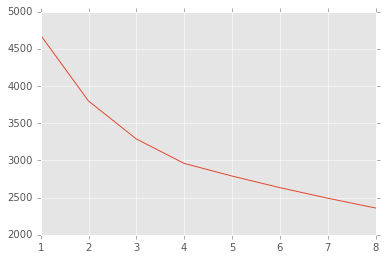

In [108]:
# not a clear elbow above, so plotting up to 8 clusters
plt.plot(k[:8], i[:8]);

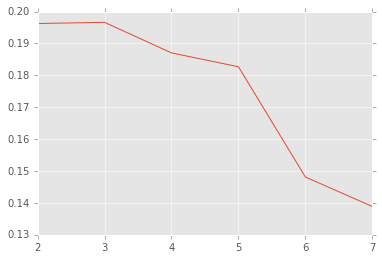

In [109]:
# plotting silhouette score
k = []
s = []
for n in range(2,8):
    km2 = KMeans(n_clusters=n)
    km2.fit(X_train)
    centers = km2.fit_predict(X_scale)

    k.append(n)
    s.append(silhouette_score(X_scale, centers))

plt.plot(k,s);

#### using 4 clusters given apparent elbow and increased silhouette score

In [73]:
# create kmeans with 4 clusters, get cluster labels
km = KMeans(n_clusters=4, n_init=20)
cluster_labels = km.fit_predict(X_train)

In [74]:
# get specific inertia / silhouette score
print('inertia:\t {:.2f}'.format(km.inertia_))
print('silhouette:\t {:.5f}'.format(silhouette_score(X_train, cluster_labels)))

inertia:	 2959.81
silhouette:	 0.19024


In [76]:
# show cluster centers
pd.set_option('display.float_format', lambda x: '%.3f' % x)
columns = {str(x): scale.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
dfclus = pd.DataFrame(columns, index=X.columns).copy()
dfclus.columns=['rotund','baby_mommas','at_risk','young_healthy']
dfclus

,rotund,baby_mommas,at_risk,young_healthy
pregnancies,1.768,7.500,3.611,2.394
glucose,124.289,132.052,160.056,106.770
bp,74.937,78.855,70.833,67.186
skin,37.070,29.762,32.722,23.606
insulin,131.317,133.977,411.361,113.894
bmi,39.417,32.538,35.803,28.000
ped,0.544,0.457,0.615,0.407
age,28.894,47.029,32.944,26.398


{0: 'rotund', 1: 'baby_mommas', 2: 'at_risk', 3: 'young_healthy'}

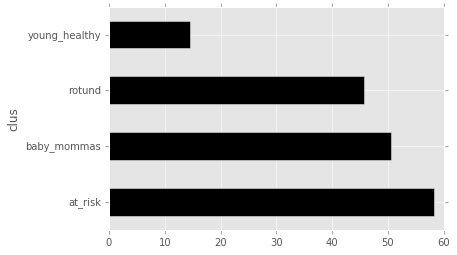

In [83]:
# Plot % diagnosis per cluster
dfcl = pd.DataFrame(list(zip(cluster_labels, y_train)), columns=['clus','class'])
dfcl['clus'] = dfcl.clus.map({i:col for i, col in enumerate(dfclus.columns)})
(dfcl.groupby(['clus']).mean()*100).plot(kind='barh', color='k', legend=None);

#### clustering yields some interesting results:
- <strong>baby_mommas</strong> - 7.5 pregnancies!, highest BP of the group, oldest (47 yo)
- <strong>at_risk</strong> - 3.6 pregancies, highest glucose (upper quartile), highest insulin, 32 yo, highest % positive diagnosis
- <strong>rotund</strong> - second highest BP, but only 29 years old.  Highest BMI and skin thickenss...
- <strong>young_healthy</strong> - 2.4 pregnancies and 26 yo. Low glucose and insulin, and lowest BP and BMI.  Lowest % positive diagnosis

Overall, silhouette score of 0.191 isn't that high, but intuitively it seems the clusters are reasonably different people.

### principal component analysis

In [84]:
from sklearn.decomposition import PCA

In [85]:
# create PCA model with 8 components (8 features)
# whiten set to True as PC's will be fed as input to models downstream
pca = PCA(whiten=True)
pca.fit(X_train)

PCA(copy=True, n_components=None, whiten=True)

In [86]:
pca.explained_variance_ratio_

array([ 0.27966516,  0.19268398,  0.1479662 ,  0.1131793 ,  0.09608312,
        0.06552513,  0.05781534,  0.04708177])

In [110]:
# graph explained_variance_ratio values and cumulative sum
evr = pca.explained_variance_ratio_ * 100
dfev = pd.DataFrame(list(zip(evr,np.cumsum(evr))), columns=['explained_variance','var_cumulative'])
dfev.index=[i+1 for i in range(8)]
dfev['var_cumulative_prior'] = dfev['var_cumulative'] - dfev['explained_variance']
dfev

,explained_variance,var_cumulative,var_cumulative_prior
1,27.967,27.967,0.000
2,19.268,47.235,27.967
3,14.797,62.032,47.235
4,11.318,73.349,62.032
5,9.608,82.958,73.349
6,6.553,89.510,82.958
7,5.782,95.292,89.510
8,4.708,100.000,95.292


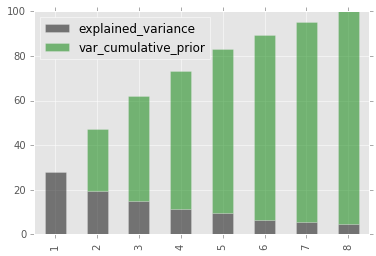

In [111]:
dfev[['explained_variance','var_cumulative_prior']].plot(kind='bar', stacked=True, color=['k','g'], alpha=0.5);

<strong>PCA results</strong>
- 82.9% variance explained with 5 features
- 89.5% variance explained with 6 features

### all_score helper function to measure models

In [169]:
def all_score(mod_nam, mod, X_test, y_test):
    '''Score model according to accuracy, recall, and f1 score
        and print scores to screen'''
    y_pred = mod.predict(X_test)
    
    s = round(accuracy_score(y_test, y_pred) * 100, 2)
    print(mod_nam + ' accuracy:\t {:.2f}%'.format(s))
    
    s = round(precision_score(y_test, y_pred) * 100, 2)
    print(mod_nam + ' precision:\t {:.2f}%'.format(s))
    
    s = round(recall_score(y_test, y_pred) * 100, 2)
    print(mod_nam + ' recall:\t\t {:.2f}%'.format(s))
    
    s = round(f1_score(y_test, y_pred) * 100, 2)
    print(mod_nam + ' f1:\t\t {:.2f}%'.format(s))

### applying k-means clusters to hw2 knn model

In [144]:
# import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [145]:
# create kNN classifier, take params from Hw2
# {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
knn_old = KNeighborsClassifier(n_neighbors=9, p=2, weights='uniform')
knn_new = KNeighborsClassifier(n_neighbors=9, p=2, weights='uniform')

In [148]:
X_train.sample(5)

,pregnancies,glucose,bp,skin,insulin,bmi,ped,age
460,1.531,-0.054,-0.032,-0.809,-0.981,-1.696,0.789,1.256
738,-0.548,-0.745,-1.025,-1.378,0.224,0.603,-0.057,-1.042
391,0.343,1.458,0.299,-0.012,-0.182,1.928,-0.398,-0.531
229,-1.142,-0.153,0.630,0.215,-1.016,1.855,-1.156,-0.786
96,-0.548,-0.975,-0.859,-0.126,-0.182,-0.124,-1.033,-0.786


In [170]:
knn_old.fit(X_train, y_train)
all_score('knn_old',knn_old,X_test,y_test)

knn_old accuracy:	 79.69%
knn_old precision:	 73.47%
knn_old recall:		 58.06%
knn_old f1:		 64.86%


In [177]:
%%%timeit
knn_old.predict(X_test)

100 loops, best of 3: 2.23 ms per loop


In [173]:
# add cluster_label as a feature in training/test data
X_train_km = X_train.copy()
X_train_km['km_label'] = cluster_labels

X_test_km = X_test.copy()
X_test_km['km_label'] = km.predict(X_test)

X_train_km.sample(5)

,pregnancies,glucose,bp,skin,insulin,bmi,ped,age,km_label
686,-0.251,0.274,-0.694,-0.012,-0.182,-1.362,-0.477,-0.956,3
657,-0.845,-0.054,0.630,2.150,0.687,0.938,2.084,0.660,0
67,-0.548,-0.416,1.622,-0.012,-0.182,1.491,1.127,1.766,1
562,-0.845,-1.139,-0.363,0.557,-0.738,0.749,-0.214,-0.786,0
539,-0.251,0.241,1.622,2.264,0.166,0.574,1.498,-0.106,0


In [174]:
knn_new.fit(X_train_km, y_train)
all_score('knn_new',knn_new,X_test_km,y_test)

knn_new accuracy:	 79.69%
knn_new precision:	 70.91%
knn_new recall:		 62.90%
knn_new f1:		 66.67%


In [175]:
%%%timeit
knn_new.predict(X_test_km)

100 loops, best of 3: 2.39 ms per loop


<strong>clusters' impact on knn model:</strong>
- equally "accurate"
- old data set (no clusters) achieved higher precision of 73.47%
- new model (with clusters) achieved higher recall and f1 scores
- new model ran 0.16ms slower... somewhat neglibible in this application

- of course, further model tuning could yield far stronger results with the new feature

### applying k-means clusters to hw2 naive-bayes model

In [178]:
# importing GaussianNB because features are already standardized
from sklearn.naive_bayes import GaussianNB

In [181]:
# create GuassianNB, nothing to tune!
nb_old = GaussianNB()
nb_old.fit(X_train, y_train);
all_score('nb_old', nb_old, X_test, y_test)

nb_old accuracy:	 77.08%
nb_old precision:	 67.31%
nb_old recall:		 56.45%
nb_old f1:		 61.40%


In [183]:
%%%timeit
nb_old.predict(X_test)

10000 loops, best of 3: 96.1 µs per loop


In [182]:
nb_new = GaussianNB()
nb_new.fit(X_train_km, y_train);
all_score('nb_new', nb_new, X_test_km, y_test)

nb_new accuracy:	 79.17%
nb_new precision:	 69.64%
nb_new recall:		 62.90%
nb_new f1:		 66.10%


In [184]:
%%%timeit
nb_new.predict(X_test_km)

10000 loops, best of 3: 120 µs per loop


<strong>clusters' impact on naive-bayes model:</strong>
- NB achieved higher accuracy, precision, recall, and f1 using the clusters label as a feature!
- NB was ~ 30% slower with the clusters label as a feature, but this is negligible
- NB performed worse than other models in terms of reliability in HW2, but has significantly higher recall and f1 now
- Given new cluster-label feature, NB performs nearly as well as knn!

### construct 5 & 6 principal component data sets

In [245]:
# construct PCA model with 5 PC's
pca5 = PCA(n_components=5,whiten=True)
X_p5_train = pd.DataFrame(pca5.fit_transform(X_train, y_train))
X_p5_test = pd.DataFrame(pca5.transform(X_test))

X_p5_train.columns = ['PC' + str(c+1) for c in X_p5_train.columns]
X_p5_test.columns = X_p5_train.columns
X_p5_test.tail()

,PC1,PC2,PC3,PC4,PC5
187,0.257,0.470,0.007,-0.182,-0.268
188,0.343,-0.695,0.518,-0.375,-0.762
189,1.487,-0.159,1.972,1.279,0.861
190,-0.009,1.438,0.127,-0.285,0.491
191,0.363,0.710,-0.675,-0.166,-0.169


In [246]:
# construct PCA model with 6 PC's
pca6 = PCA(n_components=6, whiten=True)
X_p6_train = pd.DataFrame(pca6.fit_transform(X_train, y_train))
X_p6_test = pd.DataFrame(pca6.transform(X_test))

X_p6_train.columns = ['PC' + str(c+1) for c in X_p6_train.columns]
X_p6_test.columns = X_p6_train.columns
X_p6_test.tail()

,PC1,PC2,PC3,PC4,PC5,PC6
187,0.257,0.470,0.007,-0.182,-0.268,0.013
188,0.343,-0.695,0.518,-0.375,-0.762,-1.354
189,1.487,-0.159,1.972,1.279,0.861,0.407
190,-0.009,1.438,0.127,-0.285,0.491,-0.524
191,0.363,0.710,-0.675,-0.166,-0.169,1.117


### applying PCA features to hw2 knn model

In [227]:
# fit and score knn with 5-PC data set
knn5 = KNeighborsClassifier(n_neighbors=9, p=2, weights='uniform')
knn5.fit(X_p5_train, y_train)
all_score('  knn5',knn5, X_p5_test, y_test)

  knn5 accuracy:	 77.08%
  knn5 precision:	 67.31%
  knn5 recall:		 56.45%
  knn5 f1:		 61.40%


In [228]:
%%%timeit
knn5.predict(X_p5_test)

1000 loops, best of 3: 1.64 ms per loop


In [229]:
# fit and score knn with 6-PC data set
knn6 = KNeighborsClassifier(n_neighbors=9, p=2, weights='uniform')
knn6.fit(X_p6_train, y_train)
all_score('  knn6',knn6, X_p6_test, y_test)

  knn6 accuracy:	 75.52%
  knn6 precision:	 65.96%
  knn6 recall:		 50.00%
  knn6 f1:		 56.88%


In [230]:
%%%timeit
knn6.predict(X_p6_test)

1000 loops, best of 3: 1.93 ms per loop


<strong>observations of k-means clusters on knn model:</strong>
- as expected, 5 PC's runs slightly faster than 6 PC's
- PC's datasets run significantly faster than the original dataset
- unfortunately, PCA seems to perform worse than the original data set in this case
- 6 PC's performs worse than 5, which is counterintuitive

### applying PCA features to hw2 naive-bayes model

In [241]:
nb_pc5 = GaussianNB()
nb_pc5.fit(X_p5_train, y_train);
all_score('nb_pc5', nb_pc5, X_p5_test, y_test)

nb_pc5 accuracy:	 72.92%
nb_pc5 precision:	 62.50%
nb_pc5 recall:		 40.32%
nb_pc5 f1:		 49.02%


In [242]:
%%%timeit 
nb_pc5.predict(X_p5_test)

10000 loops, best of 3: 102 µs per loop


In [243]:
nb_pc6 = GaussianNB()
nb_pc6.fit(X_p6_train, y_train);
all_score('nb_pc6', nb_pc6, X_p6_test, y_test)

nb_pc6 accuracy:	 73.44%
nb_pc6 precision:	 61.70%
nb_pc6 recall:		 46.77%
nb_pc6 f1:		 53.21%


In [244]:
%%%timeit 
nb_pc6.predict(X_p6_test)

10000 loops, best of 3: 105 µs per loop


<strong>observations of k-means clusters on naive-bayes model:</strong>
- in naive-bayes, adding a PC has almost no impact (+3 µs) on speed
- PC datasets are not much faster than original dataset in naive-bayes

### conclusions about k-means and pca in this dataset

This data definitely seems well-suited for k-means clustering and PCA.  The features are all numeric and continuous, and there are not any true "categorical" features.  

In terms of k-means clustering, I found the clusters to be intuitive groups within the dataset, which was reassuring.  I could definitely see applying this in the real world to segment customers, etc.  What was really interesting was that knn showed little improvement post-clustering, but the guassian naive-bayes model showed significant improvement.

PCA also showed promise, as I was able to achieve ~83% explained variance with 5/8 features, and ~90% explained variance with 6 features.  I did not center the data first, as I'm not sure how it translates over from our lab where all data points were pixels.  That said, PCA did not show dramatic improvement on accuracy, precision, recall, or f1 score.  It did improve the runtime of knn and NB (as expected), but by a negligible amount that does not justfiy their use (at least in my implementation).